In [1]:
import time
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torchvision.io import read_image

import pickle
import PIL.Image as Image

## Model declarations 

In [25]:
class LeNet(nn.Module):
    def __init__(self, channel=3, hideen=588, num_classes=10):
        super(LeNet, self).__init__()
        act = nn.Sigmoid
        self.body = nn.Sequential(
            nn.Conv2d(channel, 12, kernel_size=5, padding=5 // 2, stride=2),
            act(),
            nn.Conv2d(12, 12, kernel_size=5, padding=5 // 2, stride=2),
            act(),
            nn.Conv2d(12, 12, kernel_size=5, padding=5 // 2, stride=1),
            act(),
        )
        self.fc = nn.Sequential(
            nn.Linear(hideen, num_classes)
        )

    def forward(self, x):
        out = self.body(x)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

## Misc functions

In [3]:
def weights_init(m):
    try:
        if hasattr(m, "weight"):
            m.weight.data.uniform_(-0.5, 0.5)
    except Exception:
        print('warning: failed in weights_init for %s.weight' % m._get_name())
    try:
        if hasattr(m, "bias"):
            m.bias.data.uniform_(-0.5, 0.5)
    except Exception:
        print('warning: failed in weights_init for %s.bias' % m._get_name())

## Data functions

In [4]:
class Dataset_from_Image(Dataset):
    def __init__(self, imgs, labs, transform=None):
        self.imgs = imgs # img paths
        self.labs = labs # labs is ndarray
        self.transform = transform
        del imgs, labs

    def __len__(self):
        return self.labs.shape[0]

    def __getitem__(self, idx):
        lab = self.labs[idx]
        img = Image.open(self.imgs[idx])
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img = self.transform(img)
        return img, lab

In [5]:
def load_data(dataset, data_path):
    data_params = {}
    if dataset == 'MNIST':
        data_params['shape_img'] = (28, 28)
        data_params['num_classes'] = 10
        data_params['channel'] = 1
        data_params['hidden'] = 588
        data_params['dst'] = datasets.MNIST(data_path, download=False)

    elif dataset == 'cifar100':
        data_params['shape_img'] = (32, 32)
        data_params['num_classes'] = 100
        data_params['channel'] = 3
        data_params['hidden'] = 768
        data_params['dst'] = datasets.CIFAR100(data_path, download=False)

    elif dataset == 'lfw':
        data_params['shape_img'] = (32, 32)
        data_params['num_classes'] = 5749
        data_params['channel'] = 3
        data_params['hidden'] = 768
        data_params['lfw_path'] = os.path.join(root_path, '../data/lfw')
        data_params['dst'] = lfw_dataset(lfw_path, shape_img)

    else:
        exit('unknown dataset')
        
    return data_params
    

## Args

##### Paths

In [6]:
dataset = 'MNIST'
root_path = '.'

##### Model params

In [7]:
lr = 1.0
num_dummy = 1
Iteration = 300
num_exp = 1000

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [9]:
tt = transforms.Compose([transforms.ToTensor()])
tp = transforms.Compose([transforms.ToPILImage()])

In [10]:
root_path = '.'
data_path = os.path.join(root_path, '../data').replace('\\', '/')
save_path = os.path.join(root_path, 'results/iDLG_%s'%dataset).replace('\\', '/')

In [11]:
if not os.path.exists('results'):
    os.mkdir('results')
if not os.path.exists(save_path):
    os.mkdir(save_path)

#### Choosing the data

In [34]:
data_params = load_data('MNIST', data_path)
dst = data_params['dst']
num_classes = data_params['num_classes']
hidden = data_params['hidden']

Lenet

In [31]:
net = LeNet(channel=1,  
            hideen=hidden,
            num_classes=num_classes)

### Training

running 0|1000 experiment
iDLG, Try to generate 1 images
lr = 1.0
[2022-11-07 14:12:52] 0 loss = 12.68673038, mse = 0.62470239
[2022-11-07 14:12:55] 10 loss = 0.00003982, mse = 0.00008167
[2022-11-07 14:12:56] 20 loss = 0.00000002, mse = 0.00000002
imidx_list: [54952]
gt_label: [3] lab_iDLG: 3
----------------------


running 1|1000 experiment
iDLG, Try to generate 1 images
lr = 1.0
[2022-11-07 14:12:57] 0 loss = 0.23856199, mse = 0.94517899
[2022-11-07 14:12:59] 10 loss = 0.00030174, mse = 0.02152385
[2022-11-07 14:13:01] 20 loss = 0.00000475, mse = 0.00075722
[2022-11-07 14:13:03] 30 loss = 0.00000035, mse = 0.00007512
imidx_list: [57667]
gt_label: [9] lab_iDLG: 9
----------------------


running 2|1000 experiment
iDLG, Try to generate 1 images
lr = 1.0
[2022-11-07 14:13:04] 0 loss = 142.36567688, mse = 57.07735443
[2022-11-07 14:13:06] 10 loss = 33.37910843, mse = 85.54811096
[2022-11-07 14:13:08] 20 loss = 27.19676781, mse = 124.29859161
[2022-11-07 14:13:10] 30 loss = 24.84149933,

KeyboardInterrupt: 

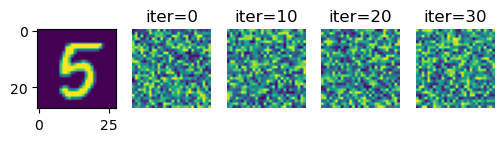

In [33]:
for idx_net in range(num_exp):
    net.apply(weights_init)

    print('running %d|%d experiment'%(idx_net, num_exp))
    net = net.to(device)
    idx_shuffle = np.random.permutation(len(dst))

    print('%s, Try to generate %d images' % (method, num_dummy))

    criterion = nn.CrossEntropyLoss().to(device)
    imidx_list = []

    for imidx in range(num_dummy):
        idx = idx_shuffle[imidx]
        imidx_list.append(idx)
        tmp_datum = tt(dst[idx][0]).float().to(device)
        tmp_datum = tmp_datum.view(1, *tmp_datum.size())
        tmp_label = torch.Tensor([dst[idx][1]]).long().to(device)
        tmp_label = tmp_label.view(1, )
        if imidx == 0:
            gt_data = tmp_datum
            gt_label = tmp_label
        else:
            gt_data = torch.cat((gt_data, tmp_datum), dim=0)
            gt_label = torch.cat((gt_label, tmp_label), dim=0)


    # compute original gradient
    out = net(gt_data)
    y = criterion(out, gt_label)
    dy_dx = torch.autograd.grad(y, net.parameters())
    original_dy_dx = list((_.detach().clone() for _ in dy_dx))

    # generate dummy data and label
    dummy_data = torch.randn(gt_data.size()).to(device).requires_grad_(True)
    dummy_label = torch.randn((gt_data.shape[0], num_classes)).to(device).requires_grad_(True)

    optimizer = torch.optim.LBFGS([dummy_data, ], lr=lr)
    # predict the ground-truth label
    label_pred = torch.argmin(torch.sum(original_dy_dx[-2], dim=-1), dim=-1).detach().reshape((1,)).requires_grad_(False)

    history = []
    history_iters = []
    losses = []
    mses = []
    train_iters = []

    print('lr =', lr)
    for iters in range(Iteration):

        def closure():
            optimizer.zero_grad()
            pred = net(dummy_data)
            dummy_loss = criterion(pred, label_pred)

            dummy_dy_dx = torch.autograd.grad(dummy_loss, net.parameters(), create_graph=True)

            grad_diff = 0
            for gx, gy in zip(dummy_dy_dx, original_dy_dx):
                grad_diff += ((gx - gy) ** 2).sum()
            grad_diff.backward()
            return grad_diff

        optimizer.step(closure)
        current_loss = closure().item()
        train_iters.append(iters)
        losses.append(current_loss)
        mses.append(torch.mean((dummy_data-gt_data)**2).item())


        if iters % int(Iteration / 30) == 0:
            current_time = str(time.strftime("[%Y-%m-%d %H:%M:%S]", time.localtime()))
            print(current_time, iters, 'loss = %.8f, mse = %.8f' %(current_loss, mses[-1]))
            history.append([tp(dummy_data[imidx].cpu()) for imidx in range(num_dummy)])
            history_iters.append(iters)

            for imidx in range(num_dummy):
                plt.figure(figsize=(12, 8))
                plt.subplot(3, 10, 1)
                plt.imshow(tp(gt_data[imidx].cpu()))
                for i in range(min(len(history), 29)):
                    plt.subplot(3, 10, i + 2)
                    plt.imshow(history[i][imidx])
                    plt.title('iter=%d' % (history_iters[i]))
                    plt.axis('off')
                if method == 'DLG':
                    plt.savefig('%s/DLG_on_%s_%05d.png' % (save_path, imidx_list, imidx_list[imidx]))
                    plt.close()
                elif method == 'iDLG':
                    plt.savefig('%s/iDLG_on_%s_%05d.png' % (save_path, imidx_list, imidx_list[imidx]))
                    plt.close()

            if current_loss < 0.000001: # converge
                break

    loss_iDLG = losses
    label_iDLG = label_pred.item()
    mse_iDLG = mses



    print('imidx_list:', imidx_list)
    print('gt_label:', gt_label.detach().cpu().data.numpy(), 'lab_iDLG:', label_iDLG)

    print('----------------------\n\n')

## Test codes